# Setup

In [760]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from IPython.display import display

pd.options.display.float_format = '{:.3f}'.format
pd.options.display.max_columns = 70
pd.options.display.max_rows = 300

In [598]:
# df = pd.read_excel('./Data/2017 - 2019 YTD Order Volume_v3.xlsx', sheet_name = "Data w RAD and GI Date")

# save as csv for quick upload in the future
#df.to_csv(r'./Data/2017 - 2019 YTD Order Volume_v3.csv', index = None, header=True)

df = pd.read_csv('./Data/2017 - 2019 YTD Order Volume_v3.csv')

In [318]:
ppg = pd.read_excel('./Data/2017 - 2019 YTD Order Volume_v3.xlsx', sheet_name = "PPG")

In [320]:
ppg.columns

Index(['Material', 'NEW PPG'], dtype='object')

In [599]:
nanppg = dict(zip(ppg.Material, ppg['NEW PPG']))
df['PPG'] = df['PPG'].fillna(df['Material'].map(nanppg))

In [600]:
#Checking NULL
df.isna().sum(axis=0).sort_values(ascending=False)

Price                             20992
PPG                                3213
Hierarchy                          1388
Ship To Name                          0
Sales Org Name                        0
Sales Org                             0
Postal Code                           0
Region Name                           0
Region                                0
Location (City)                       0
Ship-to party                         0
Distr Chan Name                       0
Sold to Name                          0
Sold-to party                         0
Req del date                          0
Actual GI Date                        0
Actual Goods Issue Year Period        0
Distr Chan                            0
Division                              0
GSV delivered                         0
Del No.                               0
Gross weight dlvrd (Lb)               0
Gross weight ord (Lb)                 0
Gds mvt qty                           0
Order qty                             0


In [601]:
df[df['Hierarchy'].isna()]['Sold to Name'].unique()

array(['JAMAC FROZEN FOOD CORPORATION', 'Butterfield & Vallis',
       'KEEFE SUPPLY CO (POI)', 'Food Warehouse Corp/St. Croix',
       'Food Warehouse Corp.', 'NOVA FOODS LLC', 'PRICE SMART INC',
       'ATLANTIC FOOD & SPICES', 'HANSCHELL INNISS, LTD',
       'The Hara Agencies', 'GLOBAL TRADING ENTERPRISES LLC',
       'INSTITUTIONAL WHLSE (POI)', "Doura Manufacturer's Agent"],
      dtype=object)

In [602]:
df1 = df.copy()

In [603]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of features: {}'.format(df1.shape[1]))
df1.dtypes

Number of rows: 606170
Number of features: 36


Sales document                      int64
Actual Goods Issue Year Period     object
Actual GI Date                      int64
Req del date                        int64
Sold-to party                       int64
Sold to Name                       object
Hierarchy                          object
Ship-to party                       int64
Ship To Name                       object
Location (City)                    object
Region                             object
Region Name                        object
Postal Code                        object
Sales Org                           int64
Sales Org Name                     object
Distr Chan                          int64
Distr Chan Name                    object
Division                            int64
Division Name                      object
Document date                       int64
Plant                              object
Plant Name                         object
Postal Code.1                      object
Location (City).1                 

# Fix Data

Changing Data Type as STR and Column type as Object

In [604]:
# to object
df1.loc[:,"Sales document":"PPG"] = df1.loc[:,"Sales document":"PPG"].astype(object)
# to string
df1.iloc[:,0:30] = df1.iloc[:,0:30].applymap(str) 

Minor Fixes

In [605]:
# Fixing City: 01810(zip) to Andover
df1['Location (City)'].replace('01810', 'Andover', inplace=True) 

# Fixing Region: at Chicago (# to IL)
temp = df1['Sold-to party'] == '10263014' 
df1.loc[temp,'Region'] = df1.loc[temp,'Region'].replace('#', 'IL')

# 01,02 to USVI. For clarification
df1.replace({'Region':{'01':'USVI','02':'USVI'}},inplace=True) 

to_datetime

In [606]:
# Converting Date type
from datetime import datetime
df1['Document date'] = df1['Document date'].apply(lambda x: dt.strptime(x, '%Y%m%d'))
# easier
df1['Actual GI Date'] = pd.to_datetime(df1['Actual GI Date'])
df1['Req del date'] = pd.to_datetime(df1['Req del date'])

Creating Year, Month, Week columns

In [656]:
df1

,Sales document,Actual Goods Issue Year Period,Actual GI Date,Req del date,Sold-to party,Sold to Name,Hierarchy,Ship-to party,Ship To Name,Location (City),Region,Region Name,Postal Code,Sales Org,Sales Org Name,Distr Chan,Distr Chan Name,Division,Division Name,Document date,Plant,Plant Name,Postal Code.1,Location (City).1,Region- Plant,Region-Plant Name,Del No.,Material,Description,PPG,Order qty,Gds mvt qty,Gross weight ord (Lb),Gross weight dlvrd (Lb),GSV delivered,Price,DD_week_num,DD_month,DD_year,DC,approx_unit_lb,description_name,description_weight
0,5003612916,2017P01,2017-01-01,2017-01-02,10193505,RANDALLS FOOD & DRUG,ALBERTSONS-SAFEWAY,10202354,RANDALLS / TOM THUMB 2012,ROANOKE,TX,Texas,76262,241,Mars US Food,10,Non Specific,51,Non Specific,2016-12-19,USV6,Waco TX DFC - Food,76712-6533,Waco,TX,Texas,5601012553,10104709,UB LONG GRAIN & WILD ORIGINAL 12/6OZ IRC,UB Flav Grains,150,150,855.150,855.150,2952.000,19.680,51,12,2016,USV6,5.701,UB LONG GRAIN WILD ORIGINAL,126OZ IRC
1,5003612916,2017P01,2017-01-01,2017-01-02,10193505,RANDALLS FOOD & DRUG,ALBERTSONS-SAFEWAY,10202354,RANDALLS / TOM THUMB 2012,ROANOKE,TX,Texas,76262,241,Mars US Food,10,Non Specific,51,Non Specific,2016-12-19,USV6,Waco TX DFC - Food,76712-6533,Waco,TX,Texas,5601012553,U0100504,UB CONVERTED BRAND RICE 6/5LB,UB Dry 5lb,35,35,1130.501,1130.500,1356.600,38.760,51,12,2016,USV6,32.300,UB CONVERTED BRAND RICE,65LB
2,5003612916,2017P01,2017-01-01,2017-01-02,10193505,RANDALLS FOOD & DRUG,ALBERTSONS-SAFEWAY,10202354,RANDALLS / TOM THUMB 2012,ROANOKE,TX,Texas,76262,241,Mars US Food,10,Non Specific,51,Non Specific,2016-12-19,USV6,Waco TX DFC - Food,76712-6533,Waco,TX,Texas,5601012553,U0307600,UNCLE BEN'S RR ROASTED CHICKEN 12/8.8OZ,UB Ready Rice,42,42,310.380,310.380,826.560,19.680,51,12,2016,USV6,7.390,UNCLE BENS RR ROASTED CHICKEN,1288OZ
3,5003612916,2017P01,2017-01-01,2017-01-02,10193505,RANDALLS FOOD & DRUG,ALBERTSONS-SAFEWAY,10202354,RANDALLS / TOM THUMB 2012,ROANOKE,TX,Texas,76262,241,Mars US Food,10,Non Specific,51,Non Specific,2016-12-19,USV6,Waco TX DFC - Food,76712-6533,Waco,TX,Texas,5601012553,U0307700,UB READY RICE LONG GRAIN & WILD 12/8.8OZ,UB Ready Rice,63,63,465.570,465.570,1239.840,19.680,51,12,2016,USV6,7.390,UB READY RICE LONG GRAIN WILD,1288OZ
4,5003612916,2017P01,2017-01-01,2017-01-02,10193505,RANDALLS FOOD & DRUG,ALBERTSONS-SAFEWAY,10202354,RANDALLS / TOM THUMB 2012,ROANOKE,TX,Texas,76262,241,Mars US Food,10,Non Specific,51,Non Specific,2016-12-19,USV6,Waco TX DFC - Food,76712-6533,Waco,TX,Texas,5601012553,U0308000,UB READY RICE SPANISH STYLE 12/8.8OZ,UB Ready Rice,63,63,465.570,465.570,1239.840,19.680,51,12,2016,USV6,7.390,UB READY RICE SPANISH STYLE,1288OZ
5,5003612916,2017P01,2017-01-01,2017-01-02,10193505,RANDALLS FOOD & DRUG,ALBERTSONS-SAFEWAY,10202354,RANDALLS / TOM THUMB 2012,ROANOKE,TX,Texas,76262,241,Mars US Food,10,Non Specific,51,Non Specific,2016-12-19,USV6,Waco TX DFC - Food,76712-6533,Waco,TX,Texas,5601012553,U0317600,UB RR ORIGINAL LONG GRAIN WHITE 12/8.8OZ,UB Ready Rice,126,126,931.141,931.140,2479.680,19.680,51,12,2016,USV6,7.390,UB RR ORIGINAL LONG GRAIN WHITE,1288OZ
6,5003612916,2017P01,2017-01-01,2017-01-02,10193505,RANDALLS FOOD & DRUG,ALBERTSONS-SAFEWAY,10202354,RANDALLS / TOM THUMB 2012,ROANOKE,TX,Texas,76262,241,Mars US Food,10,Non Specific,51,Non Specific,2016-12-19,USV6,Waco TX DFC - Food,76712-6533,Waco,TX,Texas,5601012553,U0402303,UB BOIL-IN-BAG RICE 12/15.8OZ,UB BIB,98,98,1374.059,1374.058,2387.280,24.360,51,12,2016,USV6,14.021,UB BOILINBAG RICE,12158OZ
7,5003612916,2017P01,2017-01-01,2017-01-02,10193505,RANDALLS FOOD & DRUG,ALBERTSONS-SAFEWAY,10202354,RANDALLS / TOM THUMB 2012,ROANOKE,TX,Texas,76262,241,Mars US Food,10,Non Specific,51,Non Specific,2016-12-19,USV6,Waco TX DFC - Food,76712-6533,Waco,TX,Texas,5601012553,U3390500,UB WHOLE GRAIN BROWN BIB 12/14OZ,UB BIB,70,70,871.920,871.920,1705.200,24.360,51,12,2016,USV6,12.456,UB WHOLE GRAIN BROWN BIB,1214OZ
8,5003612916,2017P01,2017-01-01,2017-01-02,10193505,RAND

In [657]:
from datetime import datetime as dt
df1['DD_week_num'] = df1['Document date'].dt.week # week_num
df1['DD_month'] = df1['Document date'].dt.month   # month
df1['DD_year'] = df1['Document date'].dt.year     # year
df1['GI_month'] = df1['Actual GI Date'].dt.month
df1['GI_week'] = df1['Actual GI Date'].dt.week
df1['GI_year'] = df1['Actual GI Date'].dt.year
df1['RDD_month'] = df1['Req del date'].dt.month
df1['RDD_week'] = df1['Req del date'].dt.week
df1['RDD_year'] = df1['Req del date'].dt.year

# 1. Basic Understanding of data

In [608]:
group0 = df1.groupby(['Region- Plant','Plant'])

colFunc = {'Sold-to party':['nunique'],
           'Description':['nunique'],
           'Del No.':['nunique','count'],
           'Order qty':['sum']        
          }

analysis = group0.agg(colFunc)
analysis

Sold-to party Description Del No.         Order qty
                          nunique     nunique nunique   count       sum
Region- Plant Plant                                                    
CA            USD3             58         137    4129   45727   3551057
GA            USE2             56         148    4593   62529   4957173
IL            USC9             41         129    2448   34590   1984211
              USR7              1           3      31      31     53964
              USV2             32         116     909   14371   1128887
MS            USJ7            126         249   37404  343431  30007664
PA            USC8             56         159    5588   83171   8493863
TX            USD2             31         103    1413   19192    817608
              USV6             23          94     278    3128    280008

Possibly useful features for time-series:

 - Count of unique sold-to-party per week?
 - Count of unique description
 - Count of unique DO
 - Count of DO
 - Sum of Order Qty

# 1-1 Destribution Analysis


**TX: USD2 -> USV6** <br>
**IL: USC9 -> USV2, USR7 -> USV2**

In [609]:
print("Earliest date of USD2: {}" .format(df1.loc[df1['Plant'] == 'USC9','Document date'].min()))
print("Latest date of USD2: {}" .format(df1.loc[df1['Plant'] == 'USC9','Document date'].max()))
print("-"*50)
print("Earliest date of USV6: {}" .format(df1.loc[df1['Plant'] == 'USV6','Document date'].min()))
print("Latest date of USV6: {}" .format(df1.loc[df1['Plant'] == 'USV6','Document date'].max()))

Earliest date of USD2: 2016-08-29 00:00:00
Latest date of USD2: 2019-08-15 00:00:00
--------------------------------------------------
Earliest date of USV6: 2019-05-22 00:00:00
Latest date of USV6: 2019-09-30 00:00:00


In [610]:
print("USD2 avg GI time: {}".format(pd.to_datetime(pd.to_datetime(df1.loc[df1['Plant'] == 'USD2','Document date']).values.astype(np.int64).mean())))
print("USV6 avg GI time: {}".format(pd.to_datetime(pd.to_datetime(df1.loc[df1['Plant'] == 'USV6','Document date']).values.astype(np.int64).mean())))
print("-"*50)
print("USC9 avg GI time: {}".format(pd.to_datetime(pd.to_datetime(df1.loc[df1['Plant'] == 'USC9','Document date']).values.astype(np.int64).mean())))
print("USV2 avg GI time: {}".format(pd.to_datetime(pd.to_datetime(df1.loc[df1['Plant'] == 'USV2','Document date']).values.astype(np.int64).mean())))

USD2 avg GI time: 2018-03-25 10:30:38.265944064
USV6 avg GI time: 2019-07-31 22:38:30.997442304
--------------------------------------------------
USC9 avg GI time: 2018-01-17 12:57:32.003469312
USV2 avg GI time: 2019-05-24 07:25:59.891448064


Seems as if **USD2 has transitioned to USV6** therefore we combine them to **USV6** for IL<br>
Seems as if **USC9 has transitioned to USV2** therefore we combine them to **USV2** for TX


In [611]:
# Fixing: Plant 
df1['Plant'].replace('USD2', 'USV6', inplace=True)
df1['Plant'].replace('USC9', 'USV2', inplace=True) 
df1['Plant'].replace('USR7', 'USV2', inplace=True) 

In [612]:
group0 = df1.groupby(['Region- Plant','Plant'])

colFunc = {'Sold-to party':['nunique'],
           'Description':['nunique'],
           'Del No.':['nunique','count'],
           'Order qty':['sum']        
          }

analysis = group0.agg(colFunc)
analysis['rate'] = analysis['Order qty']/analysis['Order qty'].sum()
display(analysis)

Sold-to party Description Del No.         Order qty  rate
                          nunique     nunique nunique   count       sum      
Region- Plant Plant                                                          
CA            USD3             58         137    4129   45727   3551057 0.069
GA            USE2             56         148    4593   62529   4957173 0.097
IL            USV2             45         162    3388   48992   3167062 0.062
MS            USJ7            126         249   37404  343431  30007664 0.585
PA            USC8             56         159    5588   83171   8493863 0.166
TX            USV6             37         116    1691   22320   1097616 0.021

**MS: USJ7 holds the 60% of the business**

# 1-2 Distribution Center Master

In [613]:
dcdf = pd.read_excel('./Data/2017 - 2019 YTD Order Volume_v3.xlsx', sheet_name = "DC and State")

KeyboardInterrupt: 

In [614]:
# Fixing typo
dcdf['DC'].replace('UV2', 'USV2', inplace=True)

**State - DC mapping Master**

In [615]:
display(pd.pivot_table(dcdf, index=['DC','State'], aggfunc=np.sum)[['Abbreviation']])

Abbreviation
DC   State                      
USC8 Connecticut              CT
     Delaware                 DE
     Maine                    ME
     Maryland                 MD
     Massachusetts            MA
     New Hampshire            NH
     New Jersey               NJ
     New York                 NY
     Pennsylvania             PA
     Rhode Island             RI
     Vermont                  VT
USD3 Alaska                   AK
     California               CA
     Hawaii                   HI
     Idaho                    ID
     Nevada                   NV
     Oregon                   OR
     Washington               WA
USE2 Alabama                  AL
     Florida                  FL
     Georgia                  GA
     Mississippi              MS
     North Carolina           NC
     South Carolina           SC
     Tennessee                TN
     Virginia                 VA
     West Virginia            WV
USV2 Illinois                 IL
     Indiana                  IN
     Iowa                     IA
     Kentucky                 KY
     Michigan                 MI
     Minnesota                MN
     Montana                  MT
     Nebraska                 NE
     North Dakota             ND
     Ohio                     OH
     South Dakota             SD
     Wisconsin                WI
     Wyoming                  WY
USV6 Arizona                  AZ
     Arkansas                 AR
     Colorado                 CO
     Kansas                   KS
     Louisiana                LA
     Missouri                 MO
     New Mexico               NM
     Oklahoma                 OK
     Texas                    TX
     Utah                     UT

merging correct DC by actual-region on the dataframe

In [616]:
df1 = df1.merge(dcdf, left_on = 'Region', right_on = 'Abbreviation', how='left').drop(['Abbreviation','State'], axis=1)
df1.drop(['New Change Jan 2020','Comment'], axis=1, inplace=True)

# Orders Outside of US

The ~2000 NULL values on DC columns are from out side of US orders.

**Out of US List:**
    - Ontario
    - US Virgin Island
    - #: being somea other countries like Trinidad or Pueto Rico.. etc
    
Since we do not have State-DC map for the Out of US orders..
I'll just assume with the most frequent deliveries from the past

In [629]:
dc_result = df1[df1['DC'].isna()].groupby(['Region','Plant','Region- Plant','Location (City)'])[['Del No.']].count().reset_index()
dc_result

,Region,Plant,Region- Plant,Location (City),Del No.
0,#,USE2,GA,Barbados,8
1,#,USE2,GA,Nassau,53
2,#,USE2,GA,Pompano Beach,12
3,#,USE2,GA,St. Catherine,12
4,#,USE2,GA,Trinidad,7
5,#,USJ7,MS,Barbados,11
6,#,USJ7,MS,CEDAR RAPIDS,1
7,#,USJ7,MS,JEDDAH,681
8,#,USJ7,MS,Nassau,91
9,#,USJ7,MS,St. Catherine,20


In [630]:
# adding percentage city level
temp = dc_result.groupby(['Location (City)'])[['Del No.']].apply(lambda x: x/x.sum()).rename(columns={"Del No.": "Del % by City"})
pd.concat([dc_result, temp], axis=1).sort_values(by=['Location (City)'])

,Region,Plant,Region- Plant,Location (City),Del No.,Del % by City
0,#,USE2,GA,Barbados,8,0.421
5,#,USJ7,MS,Barbados,11,0.579
6,#,USJ7,MS,CEDAR RAPIDS,1,1.000
7,#,USJ7,MS,JEDDAH,681,1.000
1,#,USE2,GA,Nassau,53,0.368
8,#,USJ7,MS,Nassau,91,0.632
2,#,USE2,GA,Pompano Beach,12,1.000
3,#,USE2,GA,St. Catherine,12,0.375
9,#,USJ7,MS,St. Catherine,20,0.625
13,USVI,USE2,GA,St. Croix,195,1.000


For our analysis we will discard the orders Out of US. 
<br>
ifelse, uncomment below and run

In [ ]:
# ### FILL IN NA
# temp = (df['Region']=='#') & (df['Location (City)'] != 'Pompano Beach')
# df.loc[temp,'DC'] = df[temp]['DC'].fillna('USJ7')
# temp = (df['Region']=='#') & (df['Location (City)'] == 'Pompano Beach')
# df.loc[temp,'DC'] = df[temp]['DC'].fillna('USE2')

# temp = df['Region'] == 'USVI'
# df.loc[temp,'DC'] = df[temp]['DC'].fillna('USE2')

# temp = df['Location (City)'] == 'TORONTO'
# df.loc[temp,'DC'] = df[temp]['DC'].fillna('USJ7')

## Checking Missing Values

In [631]:
#Checking NULL
df1.isna().sum(axis=0).sort_values(ascending=False)

Price                             20992
DC                                 2000
Location (City)                       0
Distr Chan Name                       0
Distr Chan                            0
Sales Org Name                        0
Sales Org                             0
Postal Code                           0
Region Name                           0
Region                                0
Ship To Name                          0
Division Name                         0
Ship-to party                         0
Hierarchy                             0
Sold to Name                          0
Sold-to party                         0
Req del date                          0
Actual GI Date                        0
Actual Goods Issue Year Period        0
Division                              0
Document date                         0
DD_year                               0
PPG                                   0
DD_month                              0
DD_week_num                           0


In [632]:
df1[df1['DC'].isna()]['Location (City)'].unique()

array(['JEDDAH', 'Trinidad', 'St. Croix', 'St. Thomas', 'St. Catherine',
       'Pompano Beach', 'Nassau', 'TORONTO', 'Barbados', 'CEDAR RAPIDS'],
      dtype=object)

these are outside of US so we will drop these.

In [633]:
# DROP NA on DC column
df1.dropna(subset=['DC'], inplace=True)

Fixing Price that are NULL

In [634]:
nanp = np.array(df1[df1['Price'].isna()]['Description'].unique())
nanp = df1[df1['Description'].isin(nanp)][['Description','Price']]
nanp = nanp.dropna(axis = 0).drop_duplicates('Description')
nanp = dict(zip(nanp.Description, nanp.Price))

In [635]:
df1['Price'] = df1['Price'].fillna(df1['Description'].map(nanp))

In [636]:
missingSKU = df1[df1['Price'].isna()]['Description'].unique()
display(missingSKU)

array(['UB RR PINTO BEANS & MEX RICE 8/8.5oz',
       'UB RTH FUNGHI RISOTTO 8/240G', 'UB RTH CHEESE RISOTTO 8/240G',
       'UB READY RICE CHICKEN BROCCOLI 8/8.5OZ',
       'UB RTH SPICY MEXICAN 8/240g',
       'UB RTH BROWN RICE ONION & GARLIC 8/240G',
       'UB RTH TOMATO HRB RICE 8/240G'], dtype=object)

In [637]:
df1['approx_unit_lb'] = df1['Gross weight ord (Lb)']/df1['Order qty']

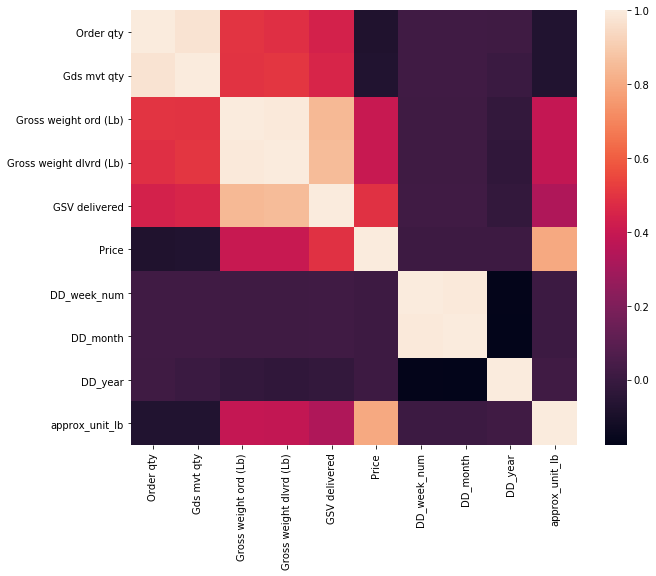

In [638]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr())
plt.show();

using approx_unit_lb to fill in nan price

New columns stripping DESCRIPTION

In [641]:
import re
import string
# rstrip() is to remove potential whitespace at the end of the string
def prod_to_category(x):
    try:
        x = "".join(l for l in x if l not in string.punctuation) # strip punctuation
        category = x[:(re.search('\d',x).start())].strip()
        return category
    except:
        return x
    
    
def prod_to_weight(x):
    try:
        x = "".join(l for l in x if l not in string.punctuation) # strip punctuation
        weight = x[(re.search('\d',x).start()):].strip()
        return weight
    except:
        return np.nan

In [642]:
df1['description_name'] = df1['Description'].apply(lambda x: prod_to_category(x))
df1['description_weight'] = df1['Description'].apply(lambda x: prod_to_weight(x))

In [646]:
df1[df1['Description'].isin(missingSKU)].groupby(['PPG','description_name','description_weight']).agg({'Price':['mean']})

Price
                                                                           mean
PPG                   description_name                description_weight       
UB Ready Rice         UB RR PINTO BEANS  MEX RICE     885oz              13.486
UB Ready Rice - Innov UB READY RICE CHICKEN BROCCOLI  885OZ              13.663
UB Risotto            UB RTH CHEESE RISOTTO           8240G              15.470
                      UB RTH FUNGHI RISOTTO           8240G              15.470
nan                   UB RTH BROWN RICE ONION  GARLIC 8240G              15.470
                      UB RTH SPICY MEXICAN            8240g              15.470
                      UB RTH TOMATO HRB RICE          8240G              15.470

In [643]:
#make a dictionary with mean price
UBR = df1[df1['PPG']=='UB Ready Rice'].pivot_table(values='Price',index=['PPG'], columns = 'description_weight',aggfunc = lambda x: x.mean())['885OZ'].values
UBRI = df1[df1['PPG']=='UB Ready Rice - Innov'].pivot_table(values='Price',index=['PPG'], columns = 'description_weight',aggfunc = lambda x: x.mean())['885OZ'].values
RIS = df1.pivot_table(values='Price', columns = 'description_weight',aggfunc = lambda x: x.mean())['9175G'].values
price = {'UB Ready Rice': UBR[0],
 'UB Ready Rice - Innov': UBRI[0],
 'UB Risotto': RIS[0]-1,
 'nan': RIS[0]-1}

In [644]:
df1['Price'] = df1['Price'].fillna(df1['PPG'].map(price))

In [647]:
#Checking NULL
df1.isna().sum(axis=0).sort_values(ascending=False)

description_weight                2804
Region                               0
Division Name                        0
Division                             0
Distr Chan Name                      0
Distr Chan                           0
Sales Org Name                       0
Sales Org                            0
Postal Code                          0
Region Name                          0
Location (City)                      0
Plant                                0
Ship To Name                         0
Ship-to party                        0
Hierarchy                            0
Sold to Name                         0
Sold-to party                        0
Req del date                         0
Actual GI Date                       0
Actual Goods Issue Year Period       0
Document date                        0
Plant Name                           0
description_name                     0
Gross weight ord (Lb)                0
approx_unit_lb                       0
DC                       

In [648]:
# np.nan to str(nan): it is not important. just make a nan group
df1['description_weight'] = df1[['description_weight']].applymap(str)

#### No more NULL values!

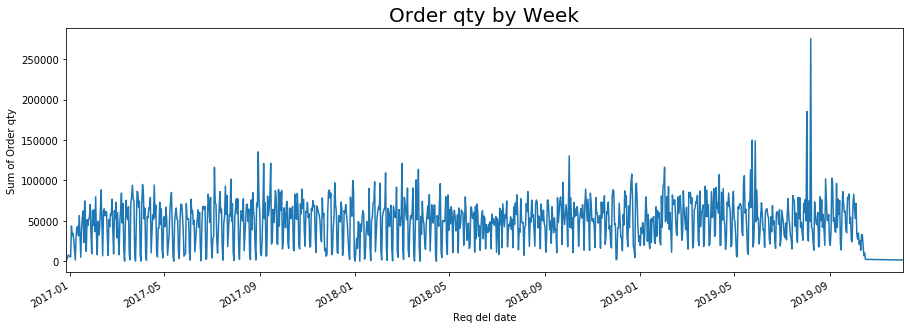

In [661]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
df1.groupby(['Req del date'])['Order qty'].sum().plot()
plt.title('Order qty by Week', size=20)
plt.ylabel('Sum of Order qty', size=10)
plt.show()

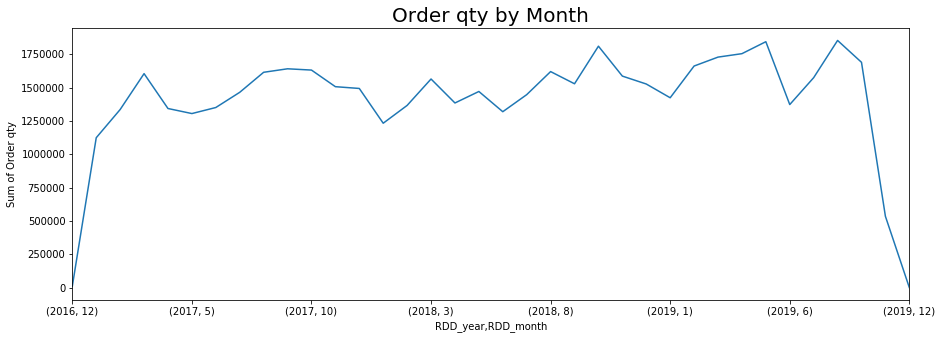

In [659]:
df1.groupby(['RDD_year','RDD_month'])['Order qty'].sum().plot()
plt.title('Order qty by Month', size=20)
plt.ylabel('Sum of Order qty', size=10)
plt.show()

In [711]:
df1['PO-to-GI'] = (df1['Actual GI Date'] - df1['Document date']).dt.days.astype('int16')
df1['GI-to-RDD'] = (df1['Req del date']- df1['Actual GI Date']).dt.days.astype('int16')
df1['PO-to-RDD'] = (df1['Req del date'] - df1['Document date']).dt.days.astype('int16')
df1['Late'] = df1['GI-to-RDD'].apply(lambda x: 1 if x<0 else 0) 

# 1) Checking if we are shipping correctly: 
***Before we had into the analysis below is the list of Plants with corresponding States***

In [732]:
DC_df = pd.DataFrame({'Plant': df1['Plant'].unique().tolist(), 'State_DC': df1['Region- Plant'].unique().tolist()})
DC_df

,Plant,State_DC
0,USV6,TX
1,USJ7,MS
2,USC8,PA
3,USE2,GA
4,USD3,CA
5,USV2,IL


In [ ]:
df['Correct_DC'] = (df['Plant'] == df['DC'])

In [733]:
hierarchy = pd.read_excel('./Data/2017 - 2019 YTD Order Volume_v3.xlsx', sheet_name = "Customer Hierarchy")

In [847]:
hierarchy.iloc[:,0:4]

,Sold-to party,Sold To Name,Parent Account,Priority
0,10193359,SCHNUCKS MARKET,ALL OTHER - WEST,7
1,10194076,DPI SPECIALTY FOOD INC,NATURAL & ORGANIC,4
2,10194266,DILLON STORES (POI),KROGER,4
3,10194679,TREE OF LIFE/GOURMET AWAR(POI),NATURAL & ORGANIC,4
4,10195193,PEYTONS 1 (POI),KROGER,4
5,10195327,HANNAFORD BROS CO (POI),DELHAIZE,4
6,10195498,HY VEE FOOD STORES,ALL OTHER - WEST,7
7,10197538,HADDON HOUSE,NATURAL & ORGANIC,4
8,10197838,UNFI-NATIONAL (UPOI),NATURAL & ORGANIC,4
9,10197839,UNITED NATURAL FOODS - EAST,NATURAL & ORGANIC,4


In [848]:
hierarchy.iloc[:,0:4] = hierarchy.iloc[:,0:4].applymap(str) 

In [837]:
sold_to_party_Exception = ['10193987','10196383','10197632','10197635','10198140','10245298','10245713',\
                           '10245932','10246586','10246645','10246774','10246885','10205201','10202571',\
                           '10193387','10197634','10205184','10195564','10429897','10195174','10195459',\
                           '10197519','10198228','10199067','10198392','10246105','10196037','10263014',\
                           '10200260','10267941','10193759','10194260','10202144','10336077','10246235',\
                           '10192687','10194593','10202194','10334798','10194021','10401878'                        
                          ]

In [853]:
exception = []

exception_hie = ['FOOD SERVICE',"BJ's","WALMART",'COSTCO',"SAM'S CLUB",'SMART & FINAL']

for i in exception_hie:
    if i == 'SMART & FINAL':
        exception.append(df1[df1['Sold to Name'].str.contains(pat = 'SMART & FINAL')]['Sold-to party'].unique())
        exception.append(hierarchy[hierarchy['Sold To Name'].str.contains(pat = 'SMART & FINAL')]['Sold-to party'].unique())
    else:
        exception.append(df1[df1['Hierarchy'] == i]['Sold-to party'].unique())
        exception.append(hierarchy[hierarchy['Parent Account'] == i]['Sold-to party'].unique())

exception = [item for sublist in exception for item in sublist] # flatten
exception = list(dict.fromkeys(exception)) # unique

print(len(exception), len(sold_to_party_Exception))

41 41


In [812]:
print(len(df1[df1['Hierarchy'] =='FOOD SERVICE']['Sold-to party']))
print(df1[df1['Hierarchy'] =='FOOD SERVICE']['Sold-to party'].isin(sold_to_party_Exception).sum())

print(len(df1[df1['Hierarchy'] =="BJ's"]['Sold-to party']))
print(df1[df1['Hierarchy'] =="BJ's"]['Sold-to party'].isin(sold_to_party_Exception).sum())

print(len(df1[df1['Hierarchy'] =="SAM'S CLUB"]['Sold-to party']))
print(df1[df1['Hierarchy'] =="SAM'S CLUB"]['Sold-to party'].isin(sold_to_party_Exception).sum())

print(len(df1[df1['Hierarchy'] =="WALMART"]['Sold-to party']))
print(df1[df1['Hierarchy'] =="WALMART"]['Sold-to party'].isin(sold_to_party_Exception).sum())

print(len(df1[df1['Hierarchy'] =="COSTCO"]['Sold-to party']))
print(df1[df1['Hierarchy'] =="COSTCO"]['Sold-to party'].isin(sold_to_party_Exception).sum())

print(len(df1[df1['Hierarchy'] =="SAM'S CLUB"]['Sold-to party']))
print(df1[df1['Hierarchy'] =="SAM'S CLUB"]['Sold-to party'].isin(sold_to_party_Exception).sum())


print(len(df1[df1['Sold to Name'].str.contains(pat = 'SMART & FINAL')]['Sold-to party']))
print(df1[df1['Sold to Name'].str.contains(pat = 'SMART & FINAL')]['Sold-to party'].isin(sold_to_party_Exception).sum())

84033
84033
1492
1492
6522
6522
205357
205357
2198
2198
6522
6522
1255
1255


In [871]:
# Changing to USJ7 for the exceptions
df1.loc[df1['Sold-to party'].apply(lambda x: True if x in sold_to_party_Exception else False),'DC'] = 'USJ7'

In [872]:
# Update Correct_DC Column
df1['Correct_DC'] = (df1['Plant'] == df1['DC'])

In [873]:
check_dc = df1.groupby(['Region','Correct_DC']).size().unstack().fillna(0)\
        .reset_index().rename(columns={True: "True", False: "False"}) \
        .set_index('Region')

In [874]:
plt.rcParams["figure.figsize"] = (15,10)

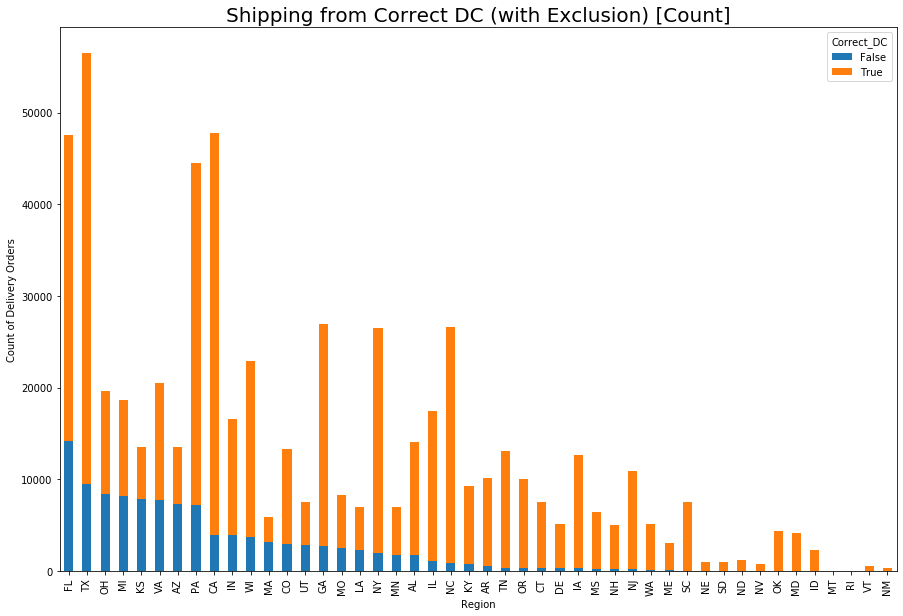

In [875]:
check_dc.sort_values(by='False',ascending=False).plot(kind='bar', stacked=True)
plt.title('Shipping from Correct DC (with Exclusion) [Count]', size=20)
plt.ylabel('Count of Delivery Orders', size=10)
plt.show()

# 2-a) Running above at Plant Level

In [876]:
# simple function call for total and rate column on pivots
def totNrate(df):
    df['Total'] = df[False]+df[True]
    df['Rate'] = df[True] / (df[False] + df[True])
    return df

In [880]:
TF_rate_df = df1.pivot_table(values='Order qty', index='DC', columns='Correct_DC', aggfunc = lambda x: x.sum()).fillna(0)
TF_rate_df = totNrate(TF_rate_df)
TF_rate_df = TF_rate_df.sort_values(by='Rate', ascending = False)  # Sort
TF_rate_df = TF_rate_df.merge(DC_df, left_on = 'DC', right_on = 'Plant', how = 'left') # merge State
TF_rate_df

,False,True,Total,Rate,Plant,State_DC
0,1023400,20448778,21472178,0.952,USJ7,MS
1,598719,2704864,3303583,0.819,USD3,CA
2,2299959,6991863,9291822,0.752,USC8,PA
3,2832477,3956107,6788584,0.583,USE2,GA
4,2798909,2670346,5469255,0.488,USV2,IL
5,3464921,944914,4409835,0.214,USV6,TX


In [879]:
check_dc = df1.groupby(['Region','Correct_DC']).size().unstack().fillna(0)\
        .reset_index().rename(columns={True: "True", False: "False"}) \
        .set_index('Region')

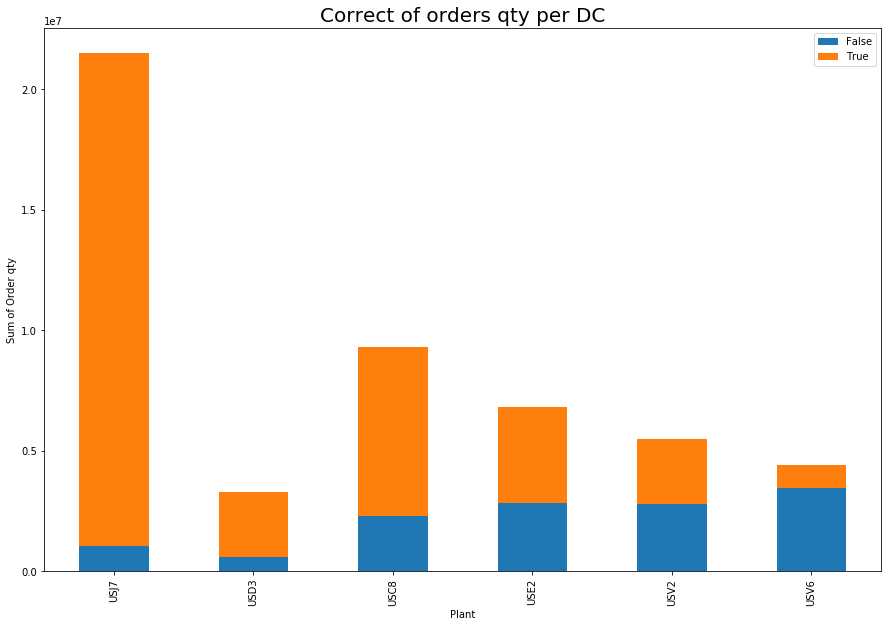

In [881]:
TF_rate_df.rename(columns={True: "True", False: "False"})[['False','True','Plant']].set_index('Plant').plot(kind='bar', stacked=True)
plt.title('Correct of orders qty per DC', size=20)
plt.ylabel('Sum of Order qty', size=10)
plt.show()

-------------------------------------------------------------
**Information**: <br>
PA, GA, IL, TX needs to be taken a look at (below 80%)

In [910]:
df1.to_csv(r'.\Data\inventory_split2.csv', date_format='%Y-%m-%d')

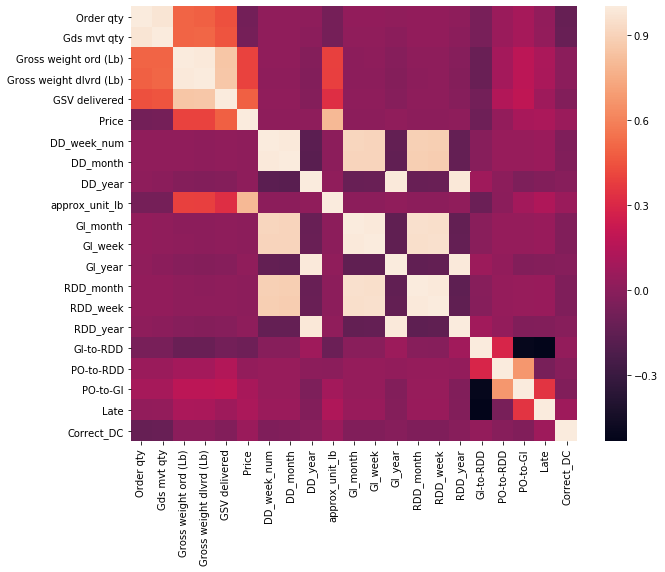

In [885]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr())
plt.show();

In [886]:
check_dc = df1.groupby(['Region','Late']).size().unstack().fillna(0)\
        .reset_index().rename(columns={True: "True", False: "False"}) \
        .set_index('Region')

In [921]:
TF_rate_df = df1.pivot_table(values='Order qty', index='DC', columns='Late', aggfunc = lambda x: x.sum()).fillna(0)
TF_rate_df= TF_rate_df.reset_index()

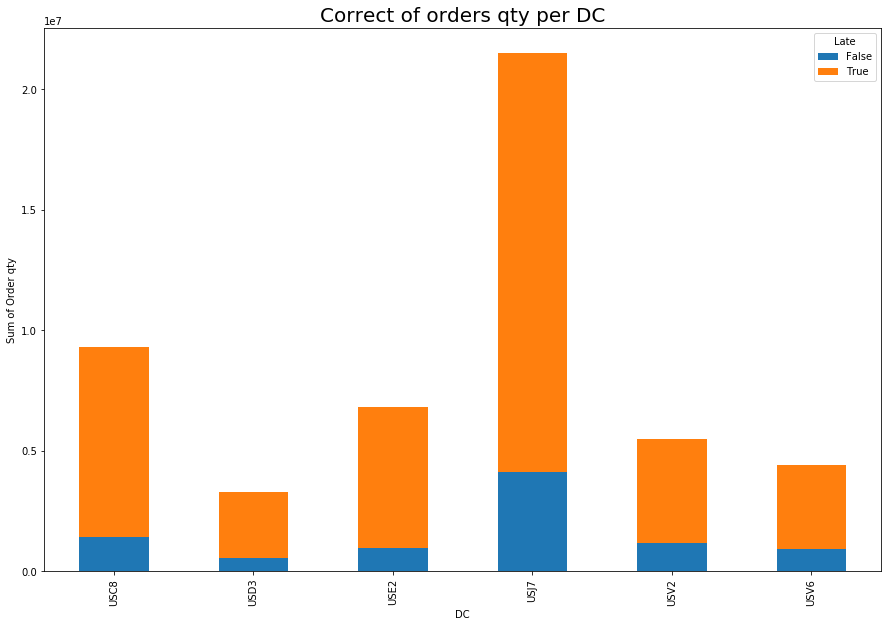

In [909]:
TF_rate_df.rename(columns={0: "True", 1: "False"})[['False','True','DC']].set_index('DC').plot(kind='bar', stacked=True)
plt.title('Late', size=20)
plt.ylabel('Sum of Order qty', size=10)
plt.show()

In [917]:
df1.describe()

,Order qty,Gds mvt qty,Gross weight ord (Lb),Gross weight dlvrd (Lb),GSV delivered,Price,DD_week_num,DD_month,DD_year,approx_unit_lb,GI_month,GI_week,GI_year,RDD_month,RDD_week,RDD_year,GI-to-RDD,PO-to-RDD,PO-to-GI,Late
count,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000,604170.000
mean,83.975,80.574,1100.977,1066.793,2030.007,57.445,24.591,6.039,2017.922,32.934,6.121,24.809,2017.936,6.140,24.916,2017.940,2.115,9.915,7.800,0.163
std,127.908,125.420,2742.024,2724.590,5177.000,273.752,14.365,3.301,0.793,172.428,3.289,14.299,0.786,3.280,14.270,0.788,4.008,4.664,5.193,0.369
min,1.000,0.000,3.150,0.000,0.000,8.160,1.000,1.000,2016.000,3.150,1.000,1.000,2017.000,1.000,1.000,2016.000,-80.000,-20.000,0.000,0.000
25%,15.000,12.000,142.727,119.040,282.480,18.840,12.000,3.000,2017.000,6.852,3.000,12.000,2017.000,3.000,13.000,2017.000,0.000,8.000,5.000,0.000
50%,42.000,42.000,449.190,432.020,972.720,19.080,24.000,6.000,2018.000,7.374,6.000,24.000,2018.000,6.000,25.000,2018.000,1.000,9.000,7.000,0.000
75%,120.000,105.000,931.141,931.140,2404.080,23.520,36.000,9.000,2019.000,12.456,9.000,37.000,2019.000,9.000,37.000,2019.000,4.000,11.000,10.000,0.000
max,6200.000,6200.000,43104.377,43104.377,134134.560,3209.840,52.000,12.000,2019.000,2105.436,12.000,52.000,2019.000,12.000,52.000,2019.000,381.000,393.000,154.000,1.000


In [916]:
df1[df1['PO-to-GI'] == 154]

,Sales document,Actual Goods Issue Year Period,Actual GI Date,Req del date,Sold-to party,Sold to Name,Hierarchy,Ship-to party,Ship To Name,Location (City),Region,Region Name,Postal Code,Sales Org,Sales Org Name,Distr Chan,Distr Chan Name,Division,Division Name,Document date,Plant,Plant Name,Postal Code.1,Location (City).1,Region- Plant,Region-Plant Name,Del No.,Material,Description,PPG,Order qty,Gds mvt qty,Gross weight ord (Lb),Gross weight dlvrd (Lb),GSV delivered,Price,DD_week_num,DD_month,DD_year,DC,approx_unit_lb,description_name,description_weight,GI_month,GI_week,GI_year,RDD_month,RDD_week,RDD_year,GI-to-RDD,PO-to-RDD,PO-to-GI,Late,Correct_DC
14011,5003551478,2017P01,2017-01-27,2017-01-27,10193824,ALDI INC (POI),VALUE TRADE CHANNEL,10196436,ALDI INC,CENTER VALLEY,PA,Pennsylvania,18034-9414,241,Mars US Food,10,Non Specific,51,Non Specific,2016-08-26,USJ7,Greenville Truckload Whse-Food,38703,Greenville,MS,Mississippi,5601011468,10141144,UNCLE BEN'S COUNTRY INN FLRSTND 5oz 72CT,UB Display,336,336,11437.104,11437.104,16934.400,50.400,34,8,2016,USC8,34.039,UNCLE BENS COUNTRY INN FLRSTND,5oz 72CT,1,4,2017,1,4,2017,0,154,154,0,False


In [918]:
df1[df1['PO-to-RDD'] == -20]

,Sales document,Actual Goods Issue Year Period,Actual GI Date,Req del date,Sold-to party,Sold to Name,Hierarchy,Ship-to party,Ship To Name,Location (City),Region,Region Name,Postal Code,Sales Org,Sales Org Name,Distr Chan,Distr Chan Name,Division,Division Name,Document date,Plant,Plant Name,Postal Code.1,Location (City).1,Region- Plant,Region-Plant Name,Del No.,Material,Description,PPG,Order qty,Gds mvt qty,Gross weight ord (Lb),Gross weight dlvrd (Lb),GSV delivered,Price,DD_week_num,DD_month,DD_year,DC,approx_unit_lb,description_name,description_weight,GI_month,GI_week,GI_year,RDD_month,RDD_week,RDD_year,GI-to-RDD,PO-to-RDD,PO-to-GI,Late,Correct_DC
470841,5004905795,2019P03,2019-02-26,2019-02-01,10195855,NASH FINCH POI HDQ,ALL OTHER - WEST,10202607,NASH FINCH CO - UPSTREAM,BELLEFONTAINE,OH,Ohio,43311,241,Mars US Food,10,Non Specific,51,Non Specific,2019-02-21,USC8,Hazleton PA DFC - Food,18202,Hazle Township,PA,Pennsylvania,5602685424,10101097,UB Ready Rice Red Beans n Rice 12/8.5oz,UB Ready Rice,63,35,449.190,249.550,676.200,19.320,8,2,2019,USV2,7.130,UB Ready Rice Red Beans n Rice,1285oz,2,9,2019,2,5,2019,-25,-20,5,1,False
470842,5004905795,2019P03,2019-02-26,2019-02-01,10195855,NASH FINCH POI HDQ,ALL OTHER - WEST,10202607,NASH FINCH CO - UPSTREAM,BELLEFONTAINE,OH,Ohio,43311,241,Mars US Food,10,Non Specific,51,Non Specific,2019-02-21,USC8,Hazleton PA DFC - Food,18202,Hazle Township,PA,Pennsylvania,5602685424,10101099,UB Ready Rice Brown Basmati 12/8.5oz,UB Ready Rice,42,42,299.461,299.460,811.440,19.320,8,2,2019,USV2,7.130,UB Ready Rice Brown Basmati,1285oz,2,9,2019,2,5,2019,-25,-20,5,1,False
470843,5004905795,2019P03,2019-02-26,2019-02-01,10195855,NASH FINCH POI HDQ,ALL OTHER - WEST,10202607,NASH FINCH CO - UPSTREAM,BELLEFONTAINE,OH,Ohio,43311,241,Mars US Food,10,Non Specific,51,Non Specific,2019-02-21,USC8,Hazleton PA DFC - Food,18202,Hazle Township,PA,Pennsylvania,5602685424,10144982,UB LGW RICE ORIG 1X12 12/6OZ,UB Flav Grains,120,37,648.120,199.837,714.840,19.320,8,2,2019,USV2,5.401,UB LGW RICE ORIG,1X12 126OZ,2,9,2019,2,5,2019,-25,-20,5,1,False
470844,5004905795,2019P03,2019-02-26,2019-02-01,10195855,NASH FINCH POI HDQ,ALL OTHER - WEST,10202607,NASH FINCH CO - UPSTREAM,BELLEFONTAINE,OH,Ohio,43311,241,Mars US Food,10,Non Specific,51,Non Specific,2019-02-21,USC8,Hazleton PA DFC - Food,18202,Hazle Township,PA,Pennsylvania,5602685424,10144983,UB LGW FAST COOK 1X12 12/6.2OZ,UB Flav Grains,72,72,408.887,408.888,1391.040,19.320,8,2,2019,USV2,5.679,UB LGW FAST COOK,1X12 1262OZ,2,9,2019,2,5,2019,-25,-20,5,1,False
470845,5004905795,2019P03,2019-02-26,2019-02-01,10195855,NASH FINCH POI HDQ,ALL OTHER - WEST,10202607,NASH FINCH CO - UPSTREAM,BELLEFONTAINE,OH,Ohio,43311,241,Mars US Food,10,Non Specific,51,Non Specific,2019-02-21,USC8,Hazleton PA DFC - Food,18202,Hazle Township,PA,Pennsylvania,5602685424,U0100504,UB CONVERTED BRAND RICE 6/5LB,UB Dry 5lb,49,49,1582.700,1582.700,1813.980,37.020,8,2,2019,USV2,32.300,UB CONVERTED BRAND RICE,65LB,2,9,2019,2,5,2019,-25,-20,5,1,False
470846,5004905795,2019P03,2019-02-26,2019-02-01,10195855,NASH FINCH POI HDQ,ALL OTHER - WEST,10202607,NASH FINCH CO - UPSTREAM,BELLEFONTAINE,OH,Ohio,43311,241,Mars US Food,10,Non Specific,51,Non Specific,2019-02-21,USC8,Hazleton PA DFC - Food,18202,Hazle Township,PA,Pennsylvania,5602685424,U0307600,UNCLE BEN'S RR ROASTED CHICKEN 12/8.8OZ,UB Ready Rice,441,441,3258.990,3258.990,8520.120,19.320,8,2,2019,USV2,7.390,UNCLE BENS RR ROASTED CHICKEN,1288OZ,2,9,2019,2,5,2019,-25,-20,5,1,False
470847,5004905795,2019P03,2019-02-26,2019-02-01,10195855,NASH FINCH POI HDQ,ALL OTHER - WEST,10202607,NASH FINCH CO - UPSTREAM,BELLEFONTAINE,OH,Ohio,43311,241,Mars US Food,10,Non Specific,51,Non Specific,2019-02-21,USC8,Hazleton PA DFC - Food,18202,Hazle Township,PA,Pennsylvania,5602685424,U0307700,UB READY RICE LONG GRAIN & WILD 12/8.8OZ,UB Ready Rice,126,126,931.141,931.140,2434.320,19.320,8,2,2019,USV2,7.390,UB READY RICE LONG GRAIN WILD,1288OZ,2,9,2019,2,5,2019,-25,-20,5,1,False